Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
uber_data = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\UberDataset.csv")

In [3]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

Data Cleaning and Preprocessing

In [5]:
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
uber_data.shape

(1156, 7)

In [7]:
# Drop rows with invalid 'START_DATE' values
uber_data = uber_data[uber_data['START_DATE'] != 'Totals']

# Convert 'START_DATE' and 'END_DATE' columns to datetime type
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'])
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'])

In [8]:
# Fill missing values in 'CATEGORY' & 'PURPOSE' column with a placeholder
uber_data['CATEGORY'].fillna('Unknown', inplace=True)
uber_data['PURPOSE'].fillna('Unknown', inplace=True)

In [9]:
# Display information about the dataset after handling null values
print("Null values after handling:")
print(uber_data.isnull().sum())

Null values after handling:
START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64


Exploratory Data Analysis (EDA)

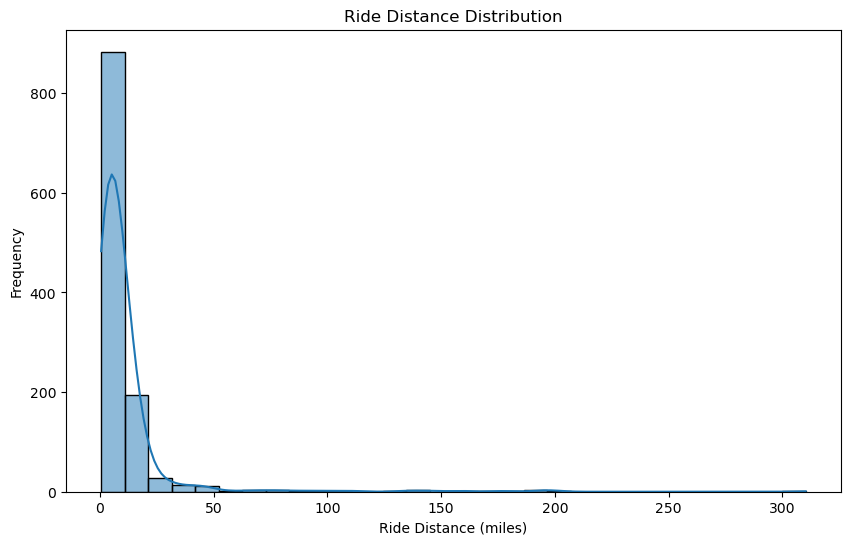

In [10]:
# Ride Distance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(uber_data['MILES'], bins=30, kde=True)
plt.title('Ride Distance Distribution')
plt.xlabel('Ride Distance (miles)')
plt.ylabel('Frequency')
plt.show()

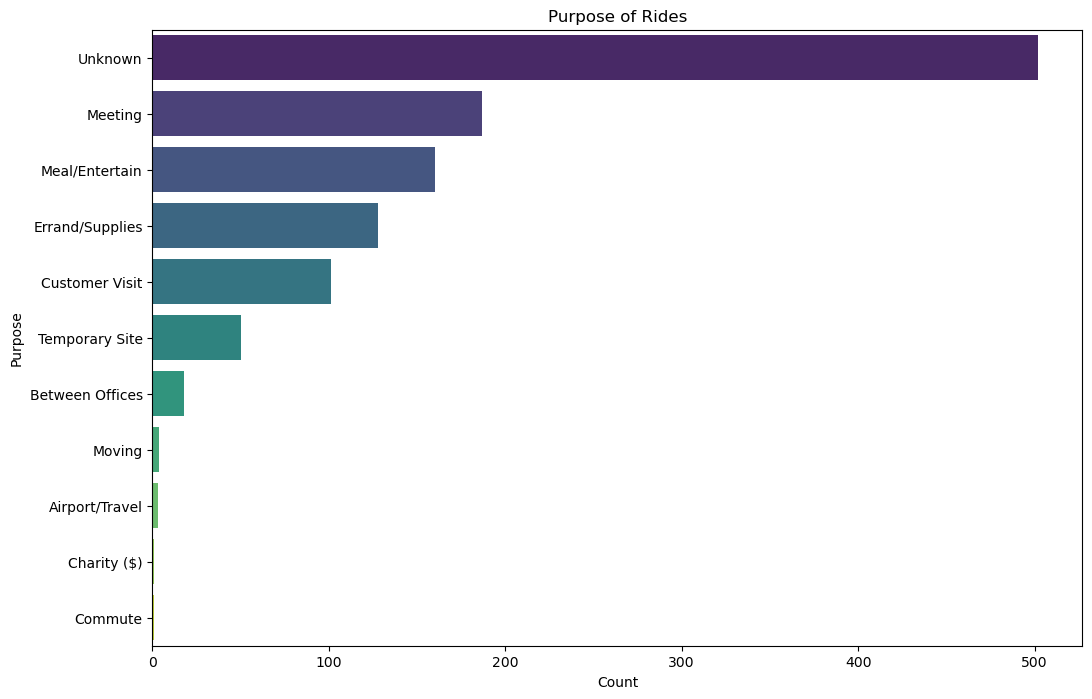

In [11]:
# Purpose of Rides
plt.figure(figsize=(12, 8))
sns.countplot(y='PURPOSE', data=uber_data, order=uber_data['PURPOSE'].value_counts().index, palette='viridis')
plt.title('Purpose of Rides')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

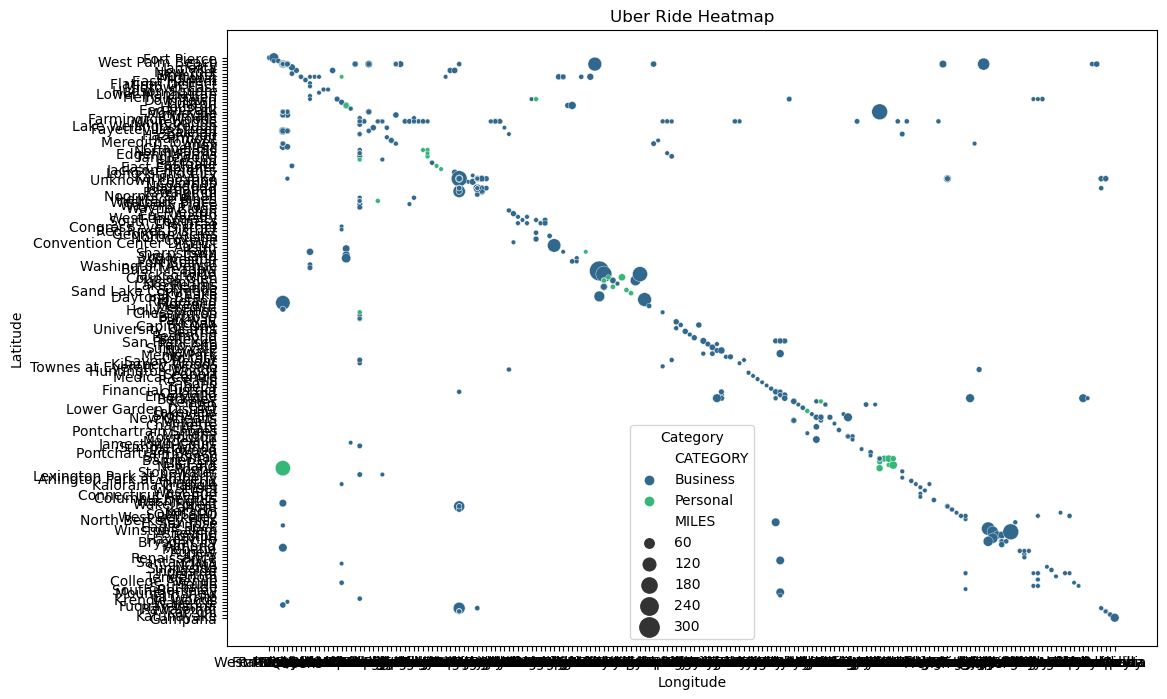

In [12]:
# Ride Heatmap - Location Analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='STOP', y='START', data=uber_data, hue='CATEGORY', palette='viridis', size='MILES', sizes=(10, 200))
plt.title('Uber Ride Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Category')
plt.show()

In [13]:
# Average Ride Distance by Purpose
average_distance_by_purpose = uber_data.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns

<module 'seaborn' from 'C:\\Users\\JAY\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

<Figure size 1000x600 with 0 Axes>

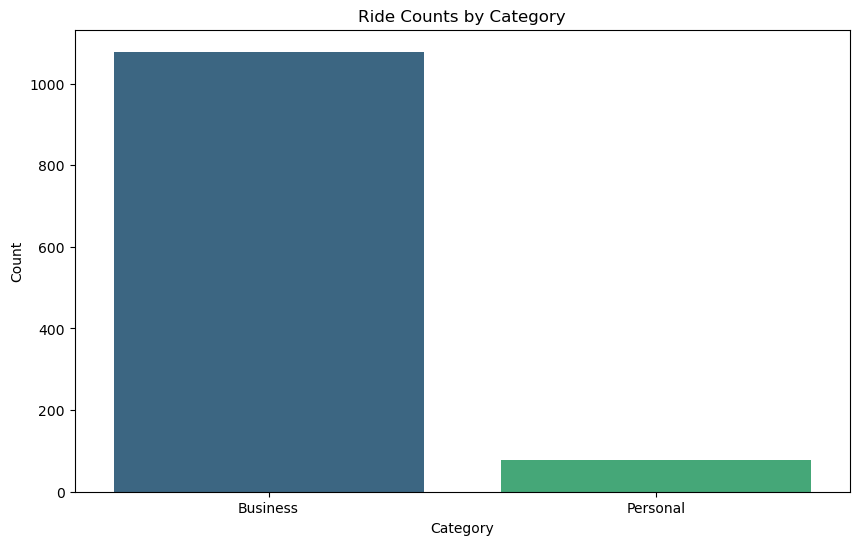

In [14]:
# Ride Counts by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=uber_data, palette='viridis')
plt.title('Ride Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()